In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

breastCancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data')

breastCancer.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [3]:
#extract top column as data
column = ['class','age','menopause','tumor-size','inv-nodes',
         'node-caps','deg-malig','breast','breast-quad','irradiat']
new_datapoint = pd.Series(breastCancer.columns, index = breastCancer.columns)

In [4]:
breastCancer = breastCancer.append(new_datapoint,ignore_index=True)
breastCancer.columns=column
breastCancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [5]:
breastCancer.isna().any() #no NaN entries

class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
dtype: bool

In [6]:
#there were detailed specifications for the attributes

#1. Class: no-recurrence-events, recurrence-events
#2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
#3. menopause: lt40, ge40, premeno.
#4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
#5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
#6. node-caps: yes, no.
#7. deg-malig: 1, 2, 3.
#8. breast: left, right.
#9. breast-quad: left-up, left-low, right-up, right-low, central.
#10. irradiat: yes, no.


In [7]:
breastCancer['class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64

In [8]:
breastCancer['age'].value_counts()

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

In [9]:
breastCancer['menopause'].value_counts()

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

In [10]:
breastCancer['tumor-size'].value_counts()

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

In [11]:
breastCancer['inv-nodes'].value_counts()

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

In [12]:
breastCancer['node-caps'].value_counts()
#has 8 entries with ? so need to remove those 8 rows

no     222
yes     56
?        8
Name: node-caps, dtype: int64

In [13]:
breastCancer['deg-malig'].value_counts()

2    130
3     84
1     71
3      1
Name: deg-malig, dtype: int64

In [14]:
breastCancer['breast'].value_counts()

left     152
right    134
Name: breast, dtype: int64

In [15]:
breastCancer['breast-quad'].value_counts()
#has one ? so remove one row

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64

In [16]:
breastCancer['irradiat'].value_counts()
#need to fix no.1 to no

no      217
yes      68
no.1      1
Name: irradiat, dtype: int64

In [17]:
#drops node-caps with ? entry rows
breastCancer.drop(breastCancer[breastCancer['node-caps']=='?'].index,inplace=True)
breastCancer['node-caps'].value_counts()

no     222
yes     56
Name: node-caps, dtype: int64

In [18]:
#drops breast-quad with ? entry row
breastCancer.drop(breastCancer[breastCancer['breast-quad']=='?'].index,inplace=True)
breastCancer['breast-quad'].value_counts()

left_low     106
left_up       94
right_up      33
right_low     23
central       21
Name: breast-quad, dtype: int64

In [19]:
idx = breastCancer[breastCancer['irradiat'] == "no.1"].index
print(type(idx[0]))

<class 'numpy.int64'>


In [20]:
breastCancer.loc[idx[0],:]

class          no-recurrence-events
age                           30-39
menopause                   premeno
tumor-size                    30-34
inv-nodes                       0-2
node-caps                        no
deg-malig                         3
breast                         left
breast-quad                left_low
irradiat                       no.1
Name: 285, dtype: object

In [21]:
#changed no.1 to no
breastCancer.at[idx,'irradiat'] = "no"
breastCancer.loc[idx[0],:]

class          no-recurrence-events
age                           30-39
menopause                   premeno
tumor-size                    30-34
inv-nodes                       0-2
node-caps                        no
deg-malig                         3
breast                         left
breast-quad                left_low
irradiat                         no
Name: 285, dtype: object

In [22]:
breastCancer['irradiat'].value_counts()

no     215
yes     62
Name: irradiat, dtype: int64

In [23]:
#all object types, must change to correct types
breastCancer.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiat       object
dtype: object

In [24]:
b1=pd.get_dummies(breastCancer,drop_first=True)
b1.head()

,class_recurrence-events,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,tumor-size_15-19,...,node-caps_yes,deg-malig_2,deg-malig_3,deg-malig_3,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


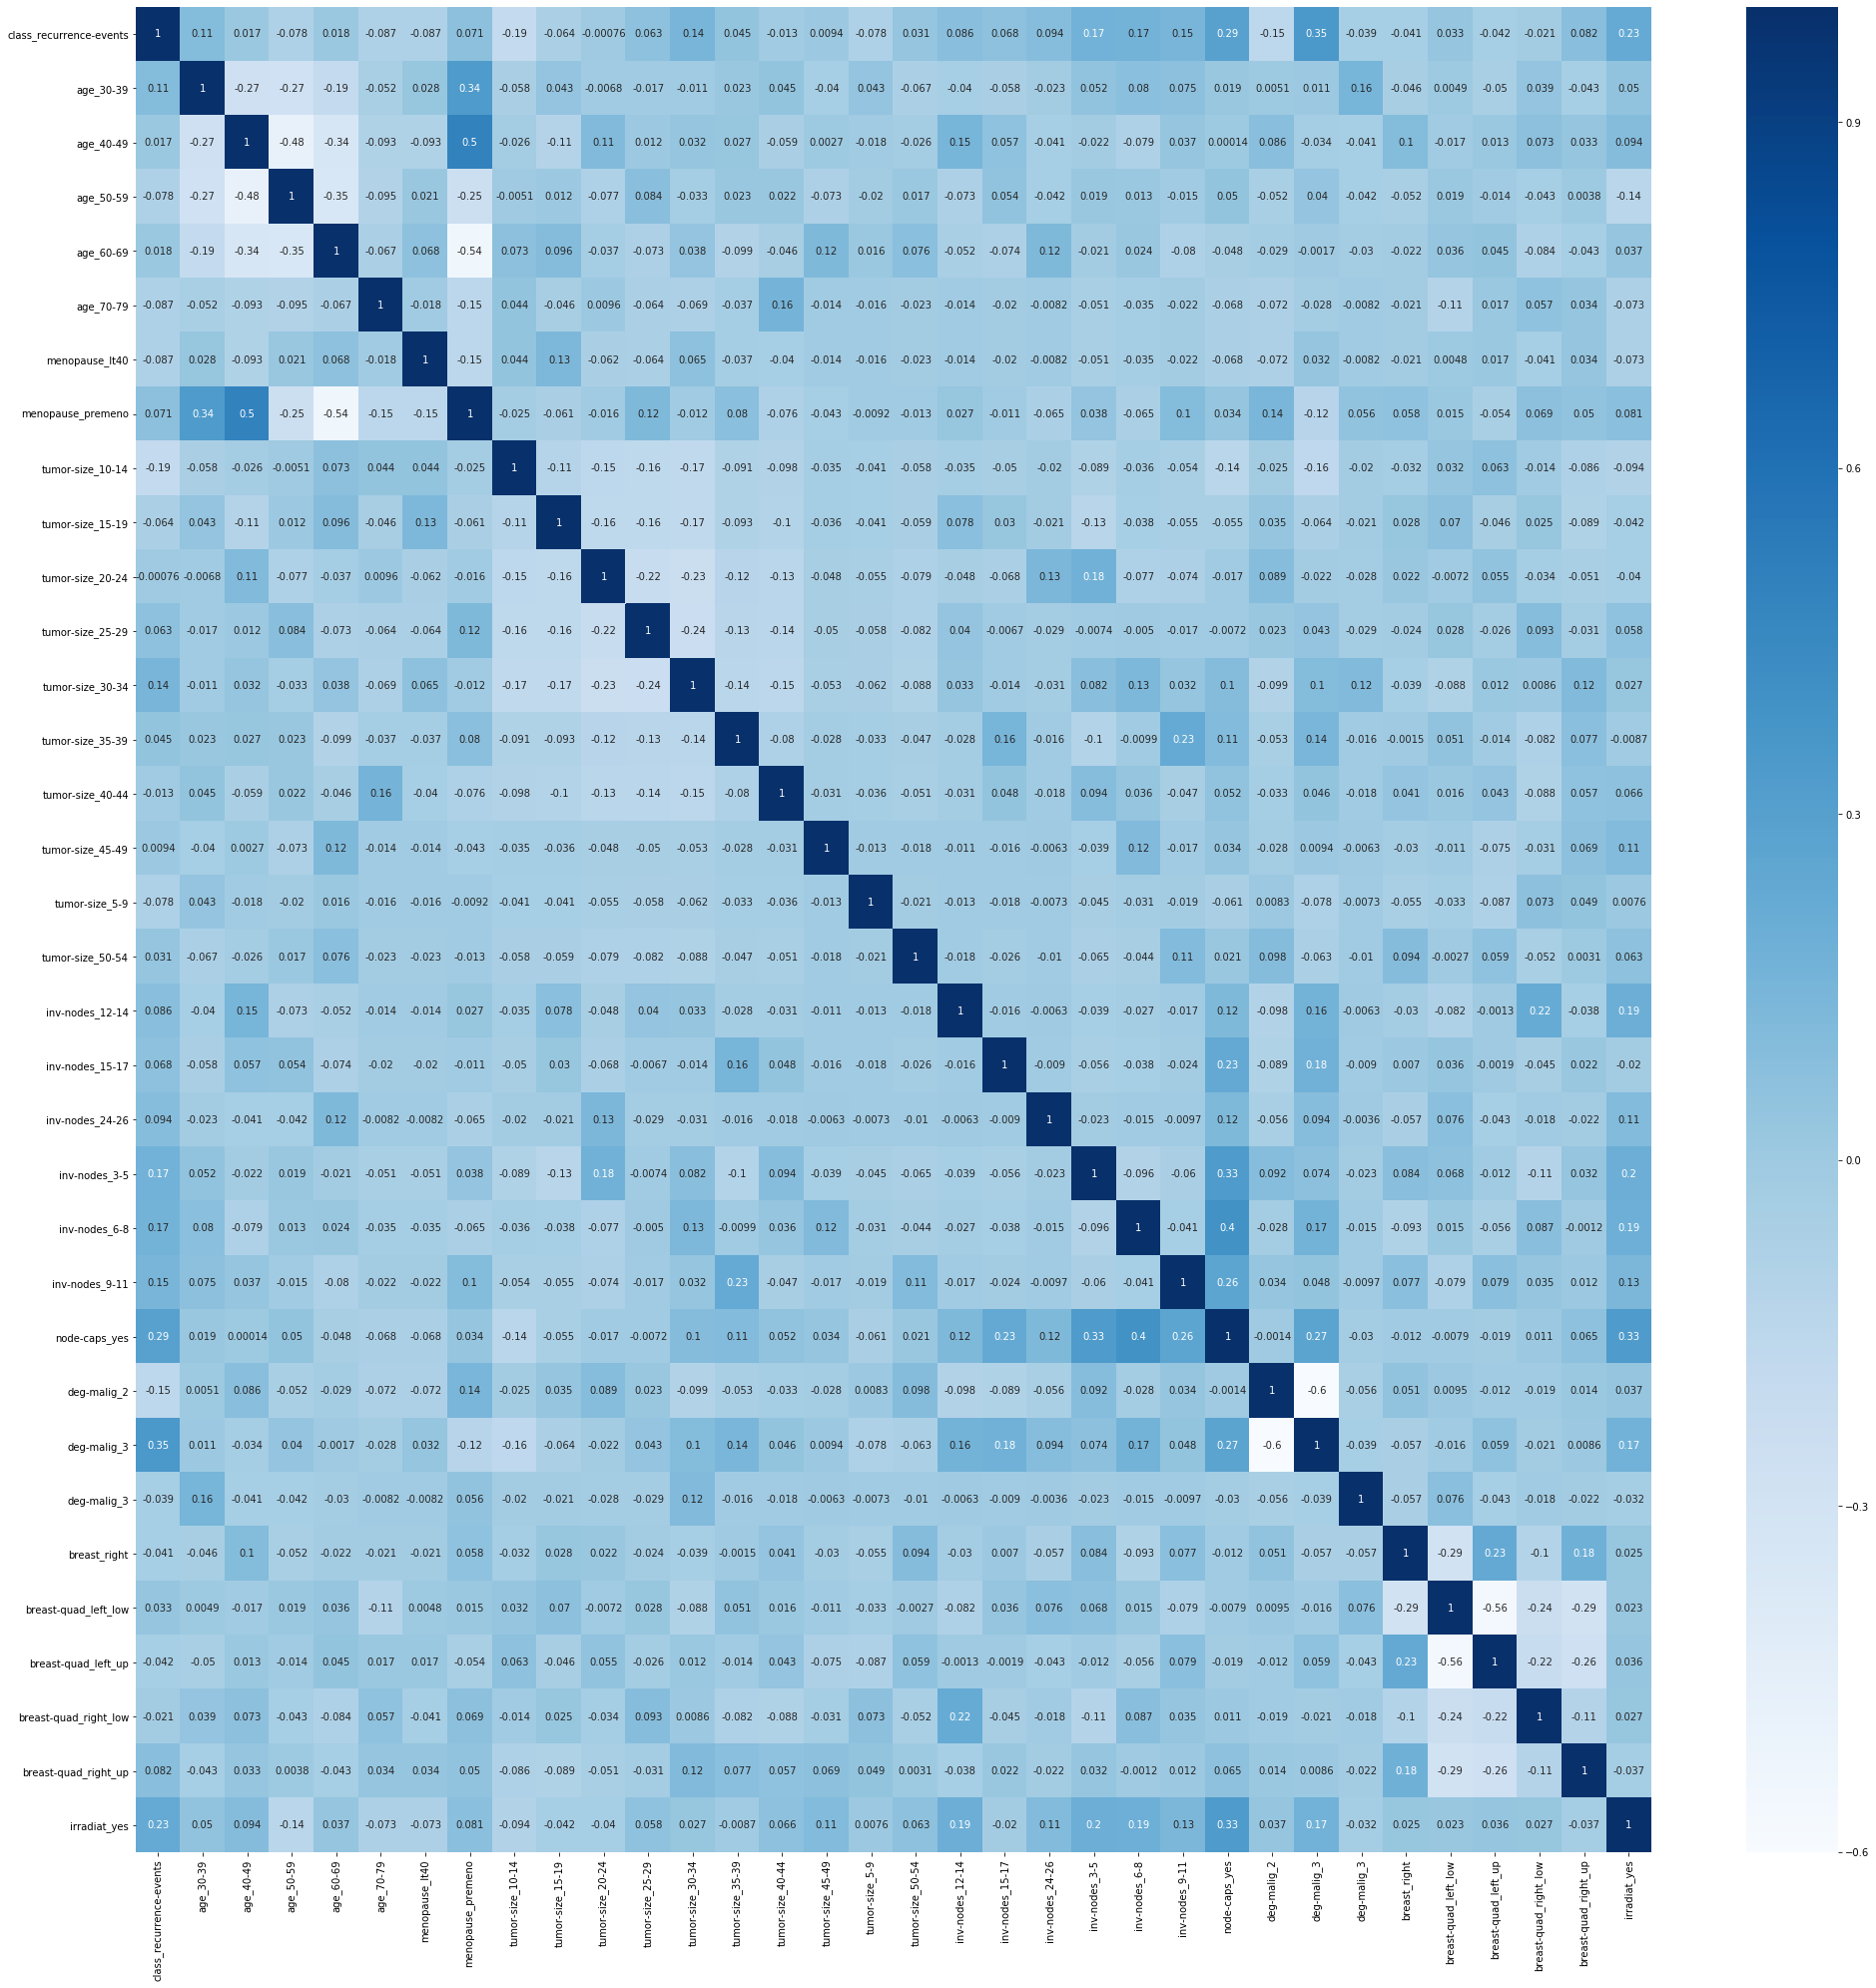

In [25]:
plt.figure(figsize = (34,34))
sns.heatmap(b1.corr(), cmap='Blues', annot = True)

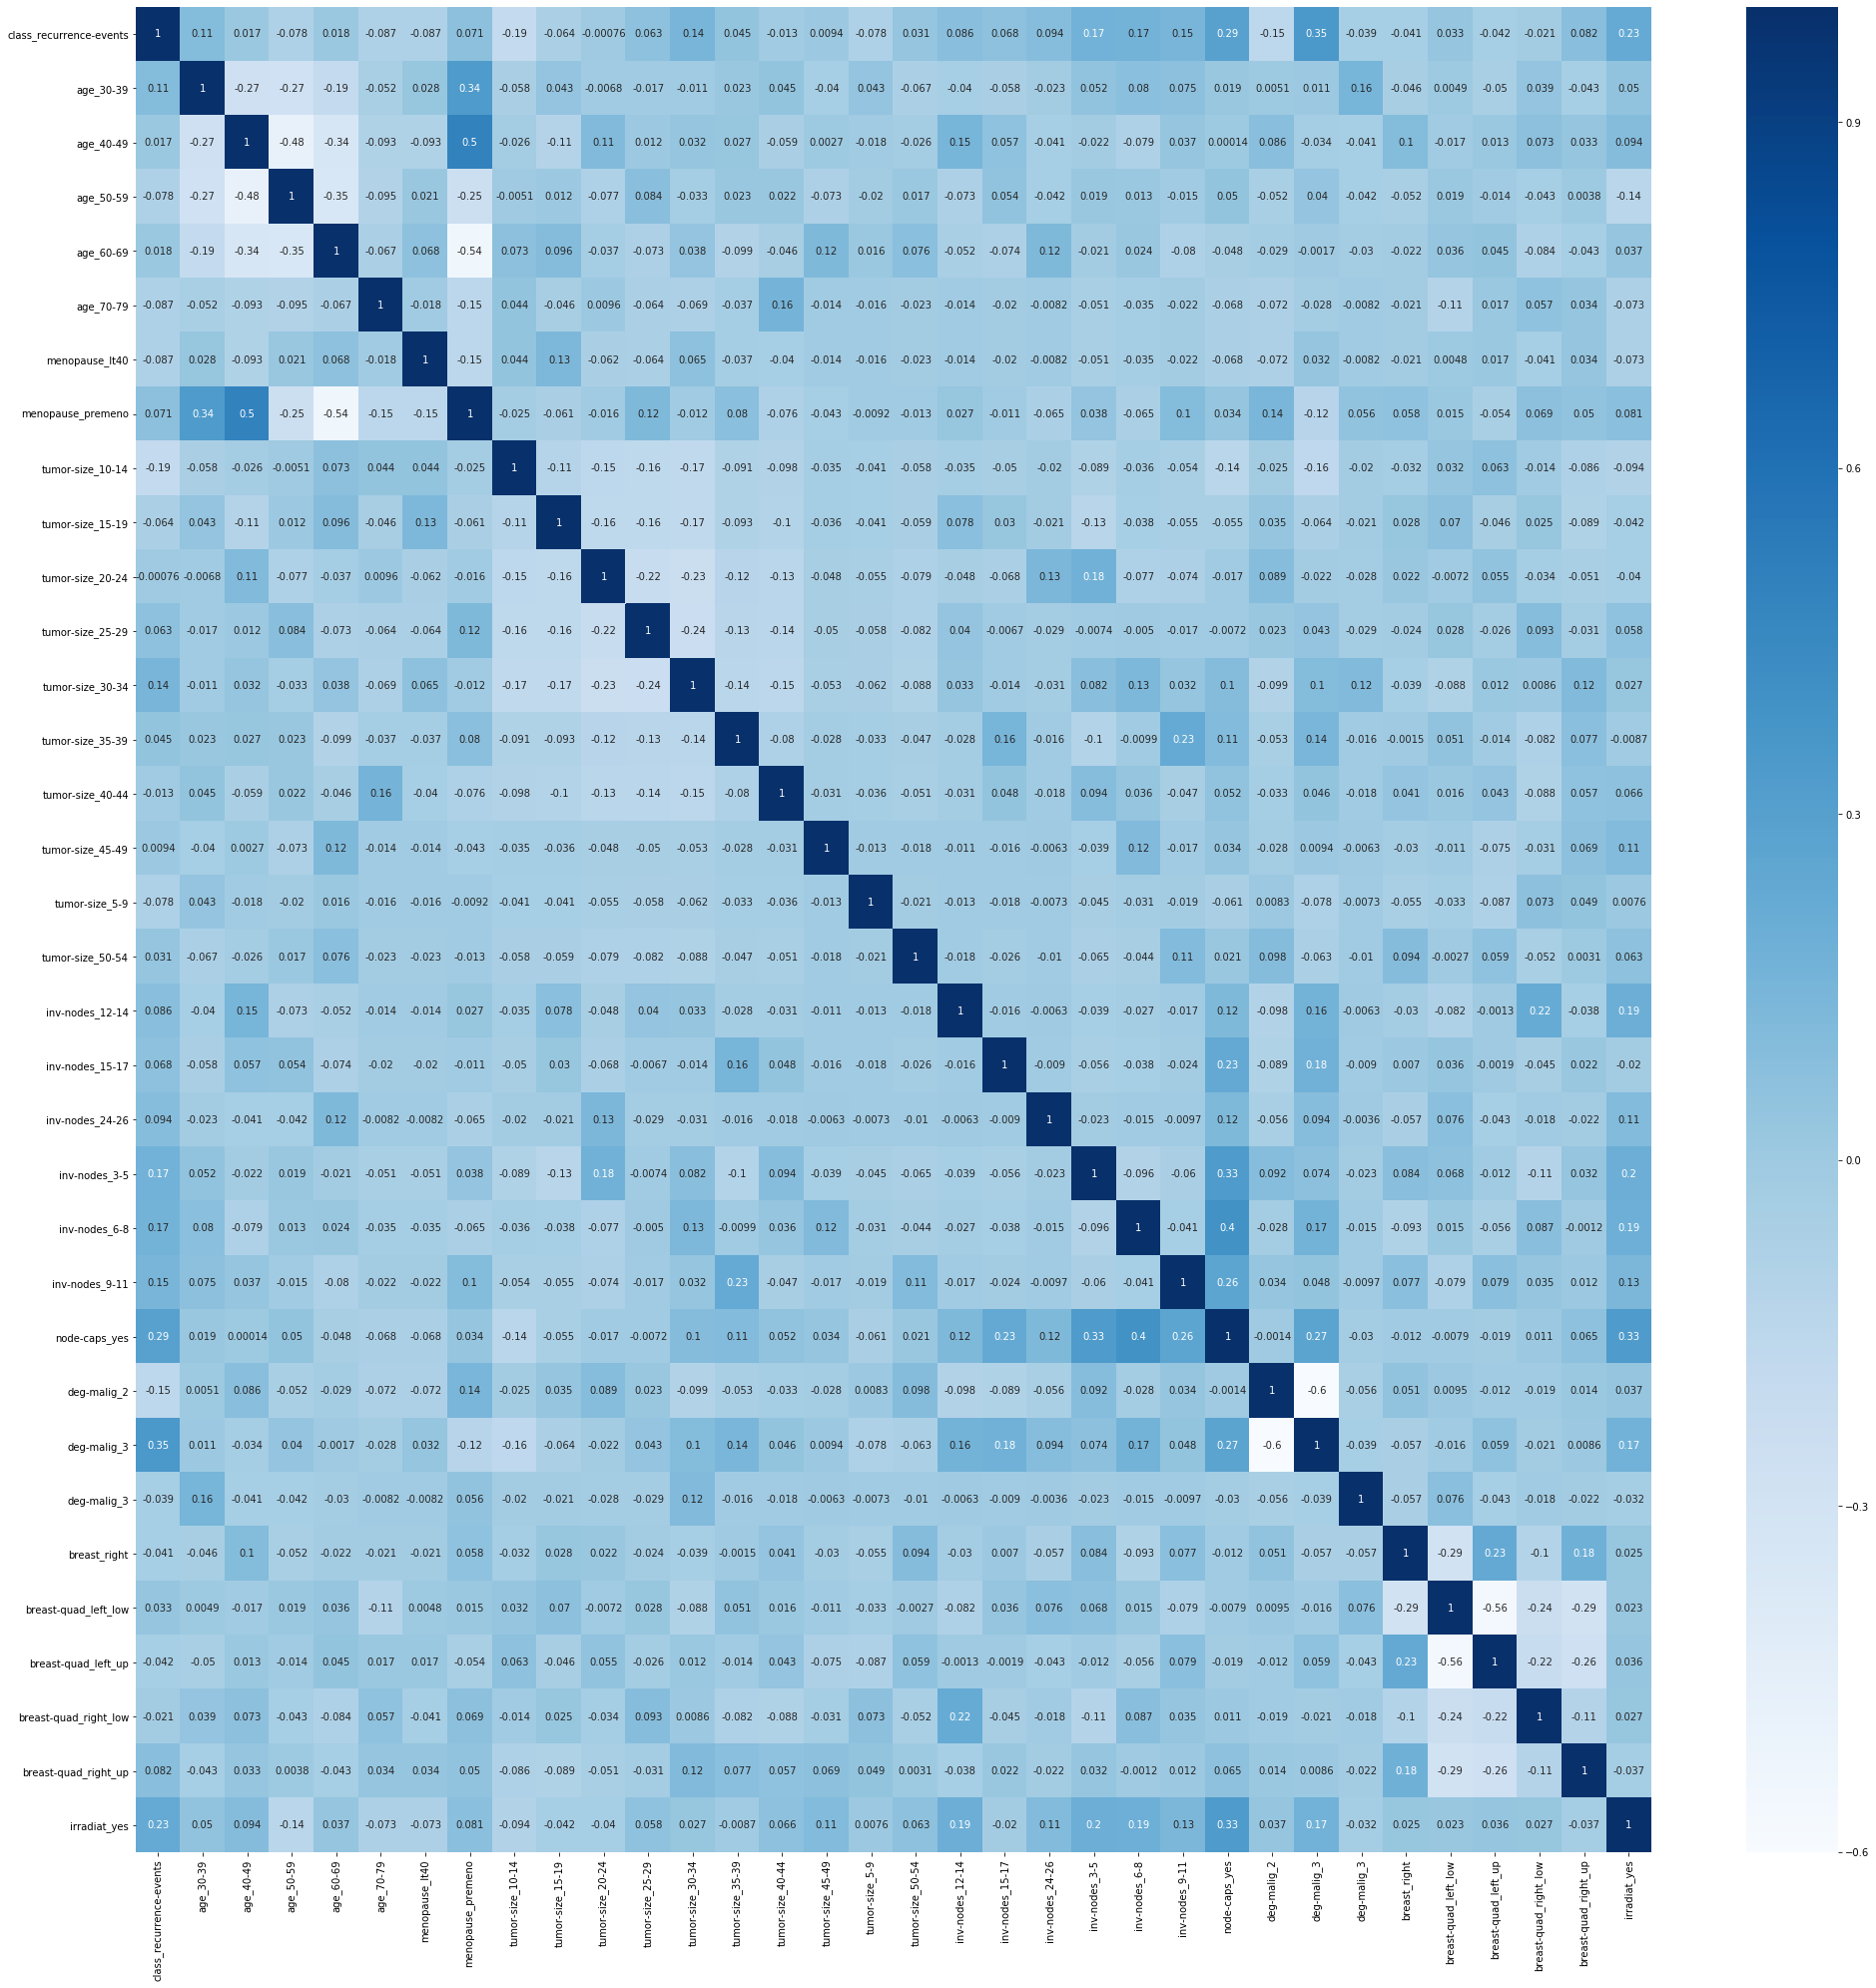

In [26]:
plt.figure(figsize = (34,34))
sns.heatmap(b1.corr(method='kendall'), cmap='Blues', annot = True)

In [27]:
breastCancer.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiat       object
dtype: object

In [28]:
idx = breastCancer[breastCancer['class'] == "no-recurrence-events"].index
for i in range(len(idx)):
    breastCancer.at[idx[i],'class'] = "0"

In [29]:
idx = breastCancer[breastCancer['class'] == "recurrence-events"].index
for i in range(len(idx)):
    breastCancer.at[idx[i],'class'] = "1"
breastCancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [30]:
breastCancer['class']=breastCancer["class"].astype("category")
breastCancer['age']=breastCancer["age"].astype("category")
breastCancer['menopause']=breastCancer["menopause"].astype("category")
breastCancer['tumor-size']=breastCancer["tumor-size"].astype("category")
breastCancer['inv-nodes']=breastCancer["inv-nodes"].astype("category")
breastCancer['node-caps']=breastCancer["node-caps"].astype("category")
#int first so the two 3's merge together
breastCancer['deg-malig']=breastCancer['deg-malig'].astype('int')
breastCancer['breast']=breastCancer["breast"].astype("category")
breastCancer['breast-quad']=breastCancer["breast-quad"].astype("category")
breastCancer['irradiat']=breastCancer["irradiat"].astype("category")
breastCancer['deg-malig']=breastCancer['deg-malig'].astype('category')

In [31]:
breastCancer.dtypes

class          category
age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig      category
breast         category
breast-quad    category
irradiat       category
dtype: object

In [32]:
breastCancer['deg-malig'].value_counts()

2    129
3     82
1     66
Name: deg-malig, dtype: int64

In [33]:
breastCancer.to_csv(r"/Users/chrisrafiaa/desktop/COMP551andru/cleanedBreast.csv")

In [34]:
b1.columns

Index(['class_recurrence-events', 'age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11',
       'node-caps_yes', 'deg-malig_2', 'deg-malig_3', 'deg-malig_3',
       'breast_right', 'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_yes'],
      dtype='object')

In [35]:
new_columns = ['age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11',
       'node-caps_yes', 'deg-malig_2', 'deg-malig_3', 'breast_right',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_yes','class_recurrence-events']

#new_columns.remove('class')
#new_columns.append('class')
new_columns

['age_30-39',
 'age_40-49',
 'age_50-59',
 'age_60-69',
 'age_70-79',
 'menopause_lt40',
 'menopause_premeno',
 'tumor-size_10-14',
 'tumor-size_15-19',
 'tumor-size_20-24',
 'tumor-size_25-29',
 'tumor-size_30-34',
 'tumor-size_35-39',
 'tumor-size_40-44',
 'tumor-size_45-49',
 'tumor-size_5-9',
 'tumor-size_50-54',
 'inv-nodes_12-14',
 'inv-nodes_15-17',
 'inv-nodes_24-26',
 'inv-nodes_3-5',
 'inv-nodes_6-8',
 'inv-nodes_9-11',
 'node-caps_yes',
 'deg-malig_2',
 'deg-malig_3',
 'breast_right',
 'breast-quad_left_low',
 'breast-quad_left_up',
 'breast-quad_right_low',
 'breast-quad_right_up',
 'irradiat_yes',
 'class_recurrence-events']

In [36]:
# b1=b1.reindex(columns=new_columns)
b1.columns
b1 = b1[new_columns]

In [37]:
b1.head()

,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,tumor-size_15-19,tumor-size_20-24,...,deg-malig_2,deg-malig_3,deg-malig_3,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,class_recurrence-events
0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [38]:
#b1.to_csv(r"/Users/chrisrafiaa/desktop/COMP551andru/cleanedBreastClassMv.csv")

In [39]:
breastCancer.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

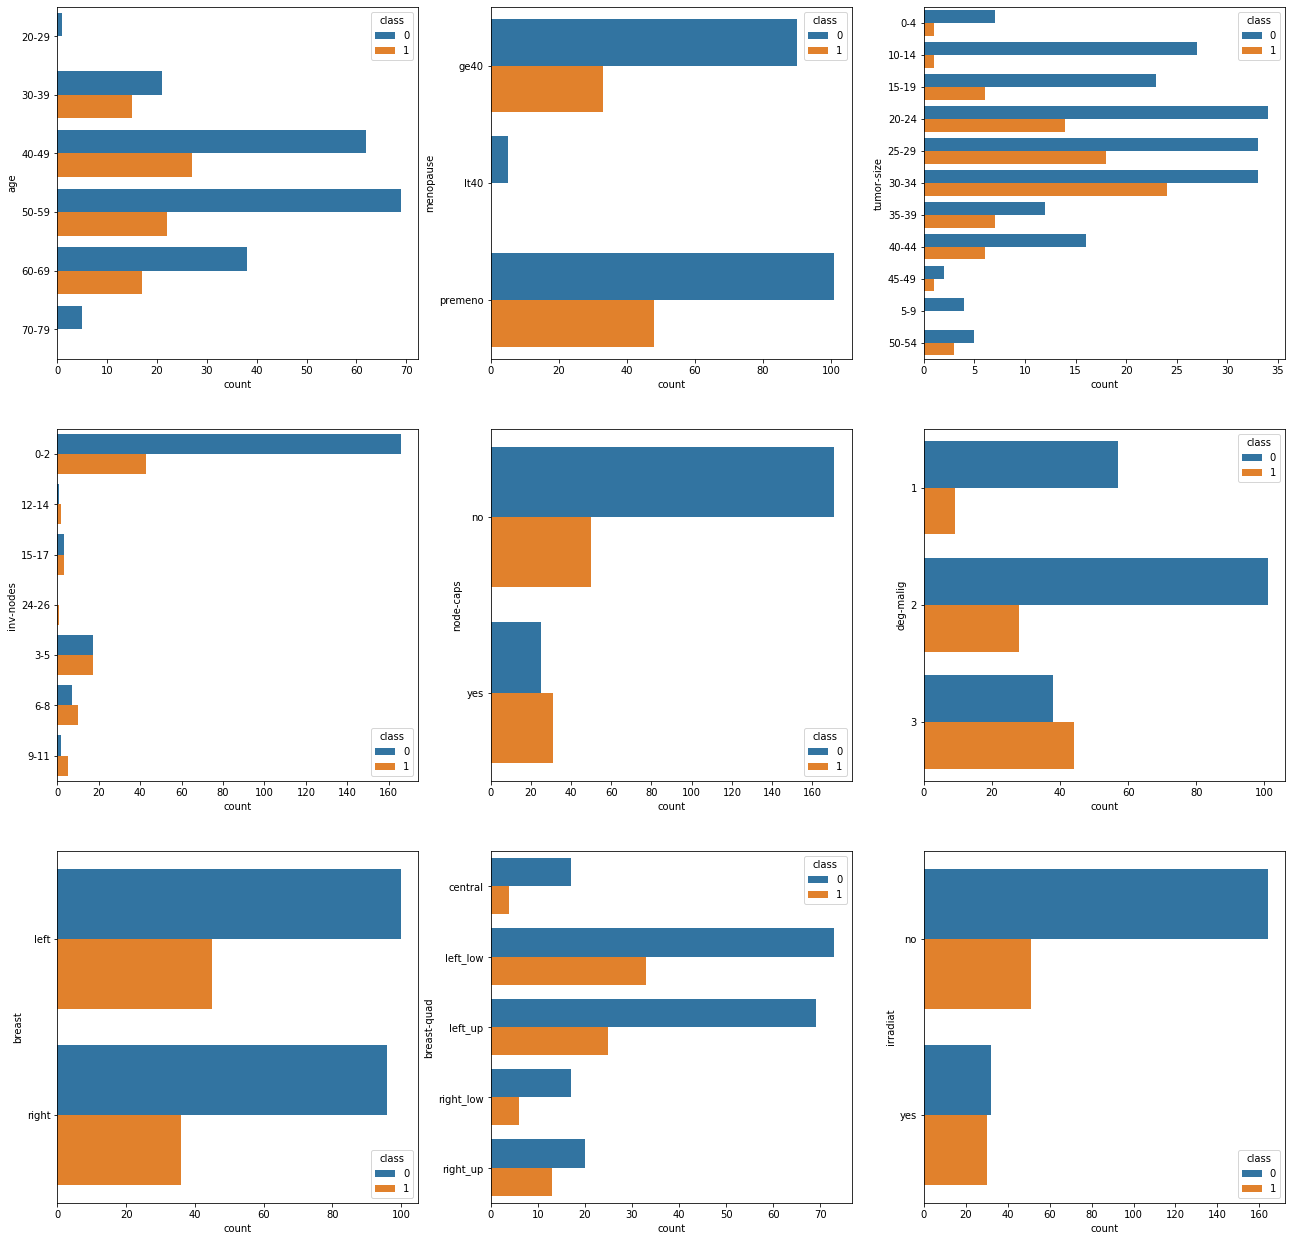

In [43]:
cat_features = breastCancer.select_dtypes(include = ['category'])

fig, ax =plt.subplots(3,3)
fig.set_figheight(22)
fig.set_figwidth(22)
sns.countplot(y = 'age', hue = 'class', data = cat_features,ax=ax[0][0])
sns.countplot(y = 'menopause', hue = 'class', data = cat_features,ax=ax[0][1])
sns.countplot(y = 'tumor-size', hue = 'class', data = cat_features,ax=ax[0][2])
sns.countplot(y = 'inv-nodes', hue = 'class', data = cat_features,ax=ax[1][0])
sns.countplot(y = 'node-caps', hue = 'class', data = cat_features,ax=ax[1][1])
sns.countplot(y = 'deg-malig', hue = 'class', data = cat_features,ax=ax[1][2])
sns.countplot(y = 'breast', hue = 'class', data = cat_features,ax=ax[2][0])
sns.countplot(y = 'breast-quad', hue = 'class', data = cat_features,ax=ax[2][1])
sns.countplot(y = 'irradiat', hue = 'class', data = cat_features,ax=ax[2][2])

In [45]:
fig.savefig("/Users/chrisrafiaa/desktop/COMP551Andru/Breast_cancer_freq.png")

In [46]:
cat_features

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
5,0,50-59,premeno,25-29,0-2,no,2,left,left_low,no
6,0,60-69,ge40,20-24,0-2,no,1,left,left_low,no
7,0,40-49,premeno,50-54,0-2,no,2,left,left_low,no
8,0,40-49,premeno,20-24,0-2,no,2,right,left_up,no
9,0,40-49,premeno,0-4,0-2,no,3,left,central,no
